 # DED-1001 Week 2 - Mandatory Project

## Introduction

#### Why is diabetes a challenge?
The number of people with diabetes rose from 108 million in 1980 to 537 million in 2022 all over the world.Management of diabetes and its complications is a huge challenge owing to several problems, including a lack of general awareness about diabetes and its complications among the population. Diabetes is a major cause of blindness, kidney failure, heart attacks, stroke and lower limb amputation.

####  What are the major factors associated with diabetes? 
* Have ever had gestational diabetes (diabetes during pregnancy) or given birth to a baby who weighed over 9 pounds.
* Impaired glucose tolerance
* Blood Pressure
* Skin Thicknes
* Insulin resistance
* Are overweight.
* Are 45 years or older
* Family history

## Objective of the study:
The main objective of this assignment is to predict whether a patient has diabetes or not and to draw meaningful inferences which in turn will be used in identifying Diabetes in a person.

## Dataset Description: 

This dataset comes from the National Institute of Diabetes and Digestive and Kidney Diseases.Variables used in the dataset:

* Pregnancies: Number of times pregnant

* Glucose: Plasma glucose concentration 2 hours in an oral glucose tolerance test

* Blood Pressure: Diastolic blood pressure (mm Hg)

* Skin Thickness: Triceps skin fold thickness (mm)

* Insulin: 2-Hour serum insulin (mu U/ml)

* BMI: Body mass index (weight in kg/(height in m)^2)

* Diabetes Pedigree Function:  indicates the function which scores likelihood of diabetes based on family history,it provides a   synthesis of the diabetes mellitus history in relatives and the genetic relationship of those relatives to the subject

* Age: Age (years)

* Outcome: Class variable (0 or 1) 0 mean non-diabetic and 1 means diabetic

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split

### Load the data

In [2]:
dataset_raw = pd.read_excel("pima-indians-diabetes e.xlsx")  
dataset = dataset_raw.copy() # creating a new copy

## Step1: Understanding the data 

In [3]:
dataset.head(10)   # To see first 10 rows from the top

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
dataset.shape   # To see no.of rows and columns of our dataset

(768, 9)

In [5]:
dataset.info()    # To get a concise summary of the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Pregnancies                 768 non-null    int64  
 1   Glucose                     768 non-null    int64  
 2   Blood Pressure              768 non-null    int64  
 3   Skin Thickness              768 non-null    int64  
 4   Insulin                     768 non-null    int64  
 5    BMI                        768 non-null    float64
 6   Diabetes Pedigree Function  768 non-null    float64
 7   Age                         768 non-null    int64  
 8   Outcome                     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
 dataset.describe()   # To view some basic statistical details like percentile, mean, std etc. of  data frame 

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Initial Observation
* The dataframe contains 768 instances and 9 columns 8 of them are features and 1 ('Outcome') is the class indicator ,among them   are integer and float values as data types
* As per .info() there is no Nan value in the data;but there are a lot of 0 values in columns where it is not sensible to have it as 0 value: 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'.These are probably missing values and need to be addressed later
* As per describe():
*  - The mean value is less then the median in case of: 'BloodPressure', 'SkinThickness', 'BMI'
*  - The mean value is more then the median in case of: 'Pregnancies', 'Glucose', 'Insulin', 'DiabetesPedigreeFunction', 'Age'      and much more in case of: 'Insulin', 'DiabetesPedigreeFunction',
*  - There is notably a large difference between 75th %tile and max values of the predictors: 'Pregnancies', 'SkinThickness',       'Insulin', 'BMI', 'DiabetesPedigreeFunction' 'Age'
* Thus there are extreme values-Outliers in our data set.
* Target variable/Dependent variable ('Outcome') is discrete, categorical, binary in nature. (0 = No disease, 1 = Disease) 
* for 'BMI' ,there is space before name,so I need to clear it first. 
* Similarly  'Blood Pressure','Skin Thickness','Diabetes Pedigree Function',have space in between the words,so I need to clear   it also.

### 1.1 Summary of  variables

In [7]:
# To rename columns name 
dataset.rename(columns={"Blood Pressure":"Blood_Pressure" ,"Skin Thickness":"Skin_Thickness", 
                        "Diabetes Pedigree Function":"Diabetes_Pedigree_Function"} , inplace =True)

In [8]:
#To clear the space before the column names 
dataset.columns = list( map(str.strip, dataset.columns) ) 
dataset.columns   # To return the column labels of the Dataset.  

Index(['Pregnancies', 'Glucose', 'Blood_Pressure', 'Skin_Thickness', 'Insulin',
       'BMI', 'Diabetes_Pedigree_Function', 'Age', 'Outcome'],
      dtype='object')

###  1.2 understand the outcomes

In [9]:
# converting Outcome into category
dataset['Outcome'] = dataset.Outcome.astype('category')

In [10]:
count = dataset.Outcome.value_counts()        # Counting total numbers in each category
print(count)

0    500
1    268
Name: Outcome, dtype: int64


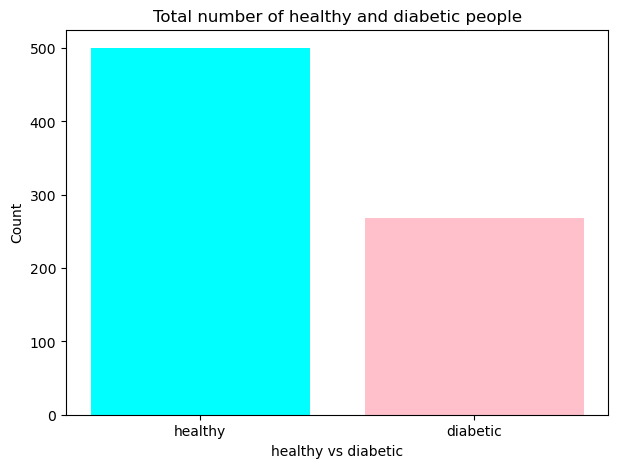

In [11]:
# Creating categories based on numbers
AM = ['healthy', 'diabetic']
# Creating plot
fig = plt.figure(figsize=(7,5))
plt.bar(AM, count,color=['cyan', 'pink'])
plt.title("Total number of healthy and diabetic people")
plt.xlabel("healthy vs diabetic")
plt.ylabel("Count")
# show plot
plt.show()

#### Observation:
* The data set looks quite imbalanced as there are 500 people who are healthy and 268 people who have diabetes.

## Step2: Data Cleaning

In [12]:
# To describe numeric and categorical columns
dataset.describe(include='all')

,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin,BMI,Diabetes_Pedigree_Function,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.0
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,NaN
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,NaN
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,NaN
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,NaN
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,NaN


### 2.1 Dealing with missing values

In [13]:
dataset.Glucose[dataset.Glucose == 0] = np.nan    #convert all 0 values into NaN 
dataset.Glucose[np.isnan(dataset.Glucose)]

C:\Users\Dell\AppData\Local\Temp\ipykernel_13148\3292922190.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.Glucose[dataset.Glucose == 0] = np.nan    #convert all 0 values into NaN


75    NaN
182   NaN
342   NaN
349   NaN
502   NaN
Name: Glucose, dtype: float64

In [14]:
dataset.Blood_Pressure[dataset.Blood_Pressure == 0] = np.nan     #convert all 0 values into NaN 
dataset.Blood_Pressure[np.isnan(dataset.Blood_Pressure)]

C:\Users\Dell\AppData\Local\Temp\ipykernel_13148\2078042571.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.Blood_Pressure[dataset.Blood_Pressure == 0] = np.nan     #convert all 0 values into NaN


7     NaN
15    NaN
49    NaN
60    NaN
78    NaN
81    NaN
172   NaN
193   NaN
222   NaN
261   NaN
266   NaN
269   NaN
300   NaN
332   NaN
336   NaN
347   NaN
357   NaN
426   NaN
430   NaN
435   NaN
453   NaN
468   NaN
484   NaN
494   NaN
522   NaN
533   NaN
535   NaN
589   NaN
601   NaN
604   NaN
619   NaN
643   NaN
697   NaN
703   NaN
706   NaN
Name: Blood_Pressure, dtype: float64

In [15]:
dataset.Skin_Thickness[dataset.Skin_Thickness == 0] = np.nan #convert all 0 values into NaN 
dataset.Skin_Thickness[np.isnan(dataset.Skin_Thickness)]

C:\Users\Dell\AppData\Local\Temp\ipykernel_13148\3821695415.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.Skin_Thickness[dataset.Skin_Thickness == 0] = np.nan #convert all 0 values into NaN


2     NaN
5     NaN
7     NaN
9     NaN
10    NaN
       ..
757   NaN
758   NaN
759   NaN
762   NaN
766   NaN
Name: Skin_Thickness, Length: 227, dtype: float64

In [16]:
dataset.Insulin[dataset.Insulin == 0] = np.nan           #convert all 0 values into NaN 
dataset.Insulin[np.isnan(dataset.Insulin)]

C:\Users\Dell\AppData\Local\Temp\ipykernel_13148\436860479.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.Insulin[dataset.Insulin == 0] = np.nan           #convert all 0 values into NaN


0     NaN
1     NaN
2     NaN
5     NaN
7     NaN
       ..
761   NaN
762   NaN
764   NaN
766   NaN
767   NaN
Name: Insulin, Length: 374, dtype: float64

In [17]:
dataset.BMI[dataset.BMI == 0] = np.nan            #convert all 0 values into NaN 
dataset.BMI[np.isnan(dataset.BMI)]

C:\Users\Dell\AppData\Local\Temp\ipykernel_13148\3330662985.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.BMI[dataset.BMI == 0] = np.nan            #convert all 0 values into NaN


9     NaN
49    NaN
60    NaN
81    NaN
145   NaN
371   NaN
426   NaN
494   NaN
522   NaN
684   NaN
706   NaN
Name: BMI, dtype: float64

In [18]:
# Checking for the null values field wise
dataset.isnull().sum()

Pregnancies                     0
Glucose                         5
Blood_Pressure                 35
Skin_Thickness                227
Insulin                       374
BMI                            11
Diabetes_Pedigree_Function      0
Age                             0
Outcome                         0
dtype: int64

#### In the dataset, we have missing  values in Glucose =5,blood pressure =35,skin thickness=227,insulin=374,BMI = 11 .

<AxesSubplot:>

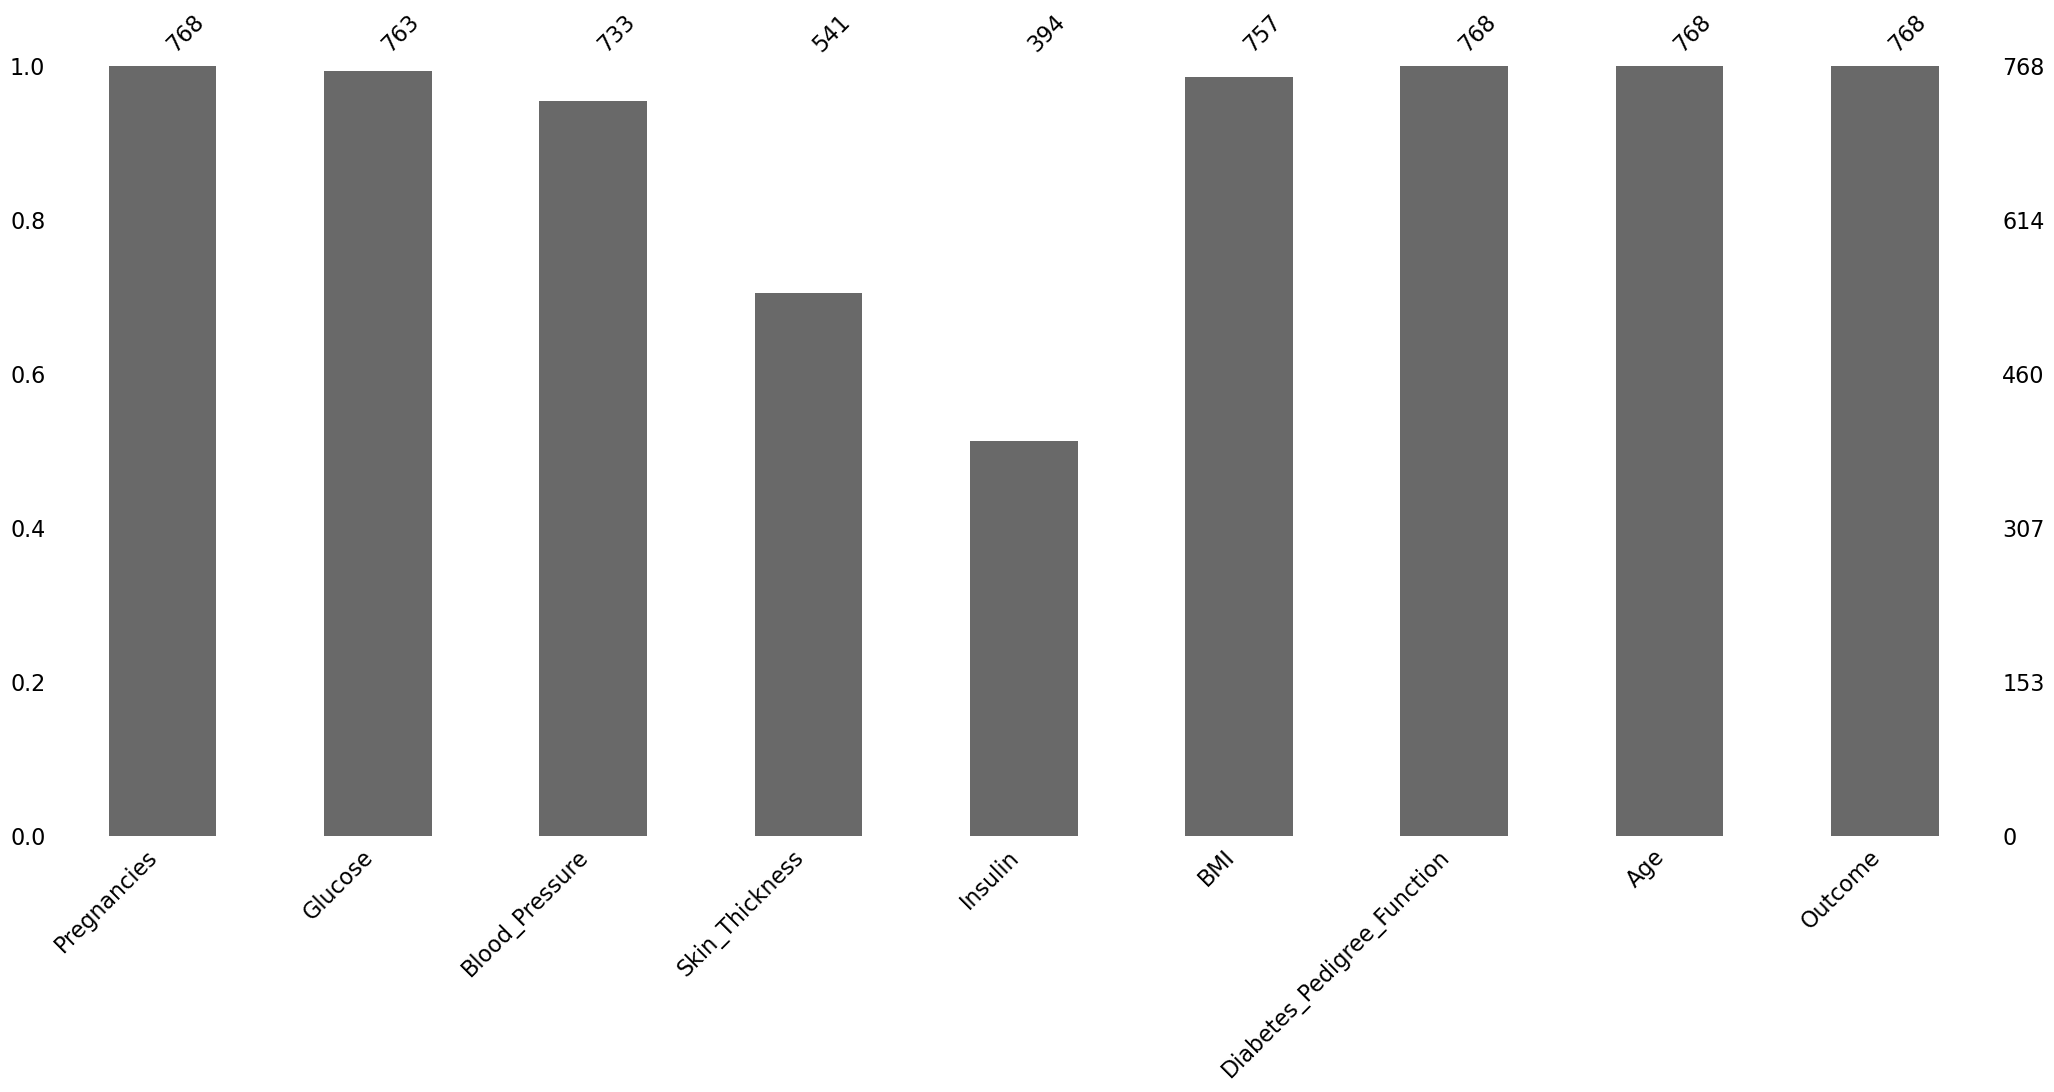

In [19]:
# creating bar plot to see the missing values
msno.bar(dataset)

<AxesSubplot:>

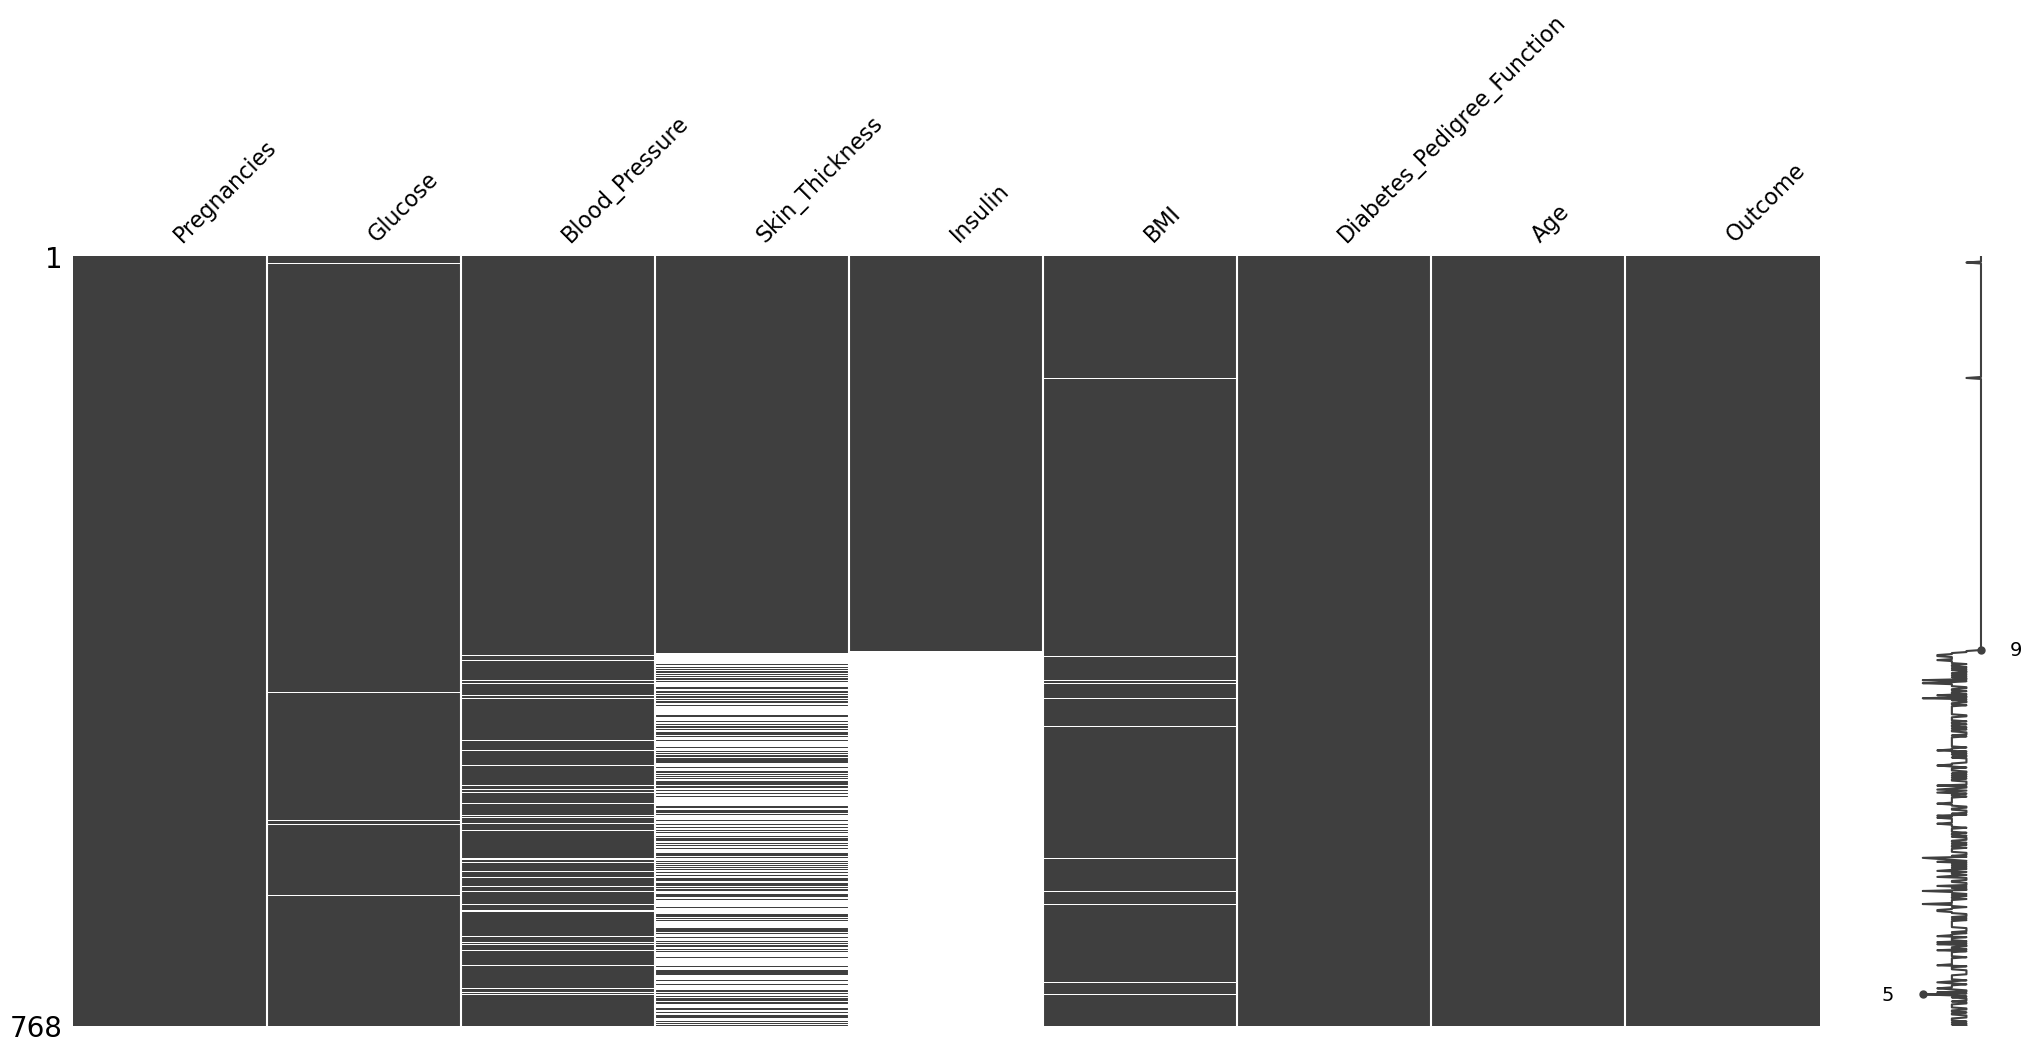

In [20]:
sorted = dataset.sort_values('Insulin')   # sort the values of insulin  to check any relationship between missing values
msno.matrix(sorted)

<AxesSubplot:>

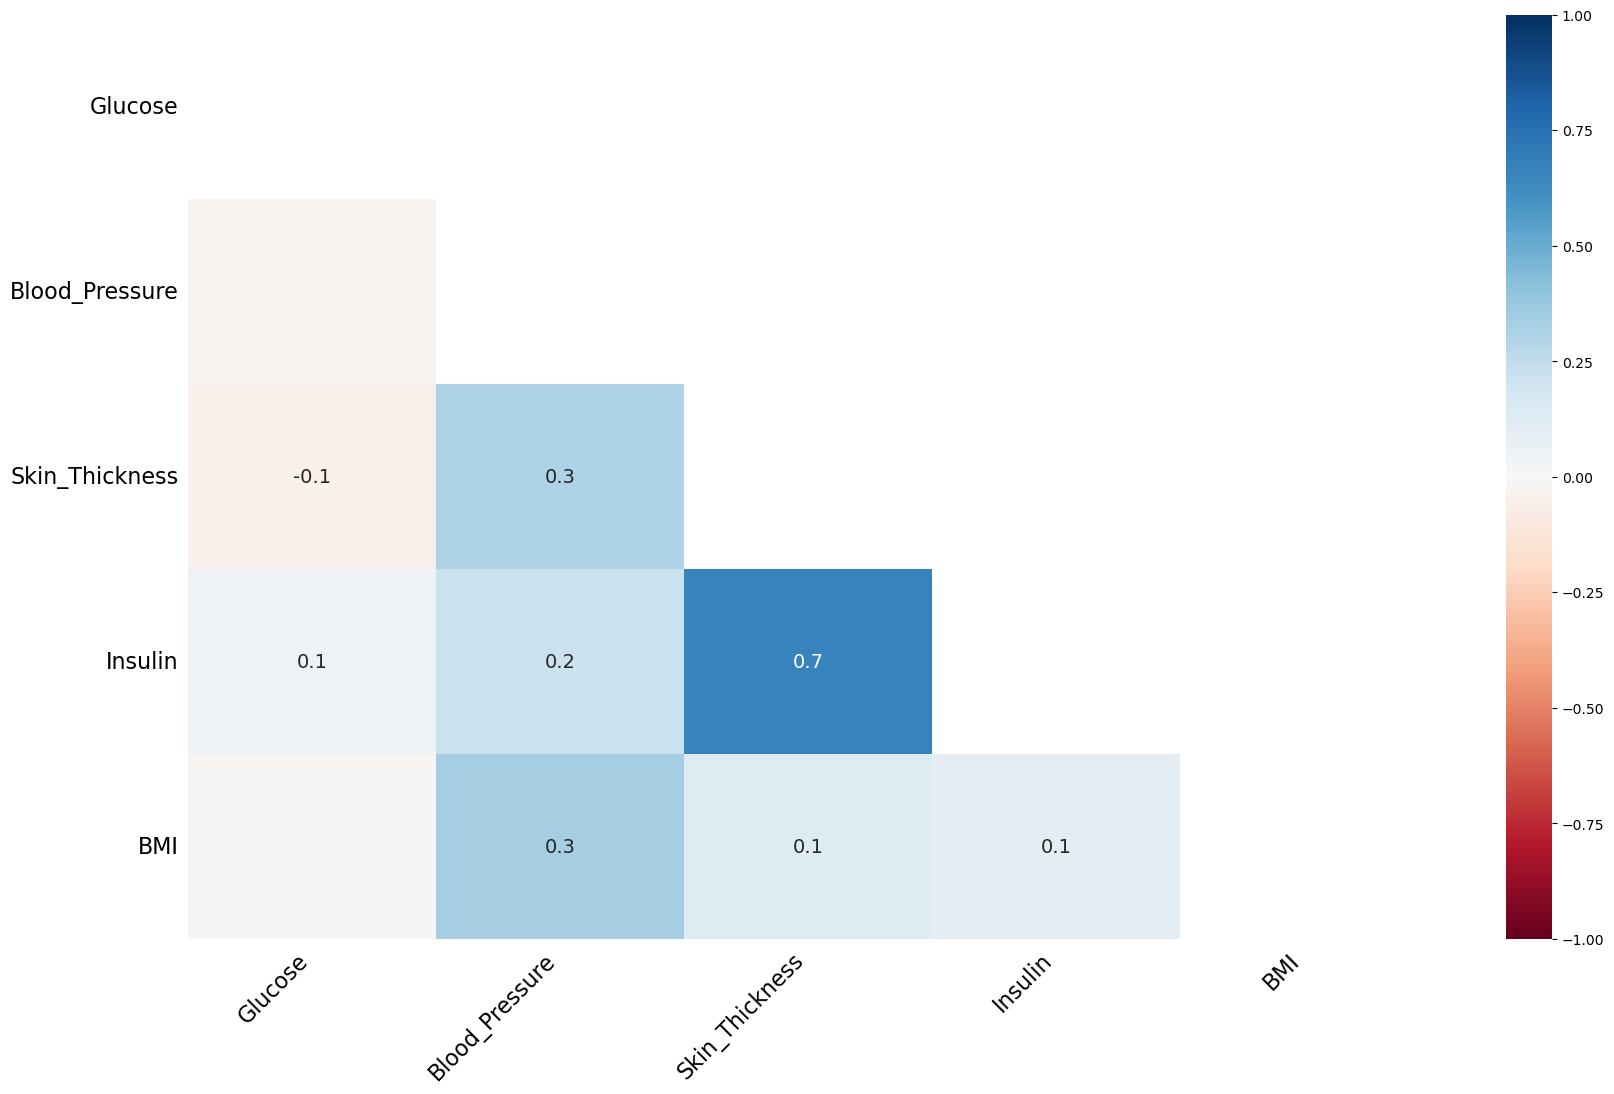

In [21]:
# To check the missing no. correlation heatmap measures nullity correlation.Finding correlation between missing values

msno.heatmap(dataset)

#### Observation : It seems there is a clear relationship between Skin_Thickness and Insulin .

### 2.2 Selecting Independent variables

In [22]:
# Splitting outcome and features to avoid data leakage
Features = dataset.drop('Outcome', axis = 1)

### 2.3 Selecting Dependent variable

In [23]:
 Outcome = dataset.Outcome

### 2.4 Advance Imputation techniques

In [24]:
from fancyimpute import KNN        # KNN Imputation technique
knn_imputer = KNN()
Features_knn = Features.copy(deep=True)
Features_knn.iloc[:, :] = knn_imputer.fit_transform(Features_knn)

Imputing row 1/768 with 1 missing, elapsed time: 0.104
Imputing row 101/768 with 2 missing, elapsed time: 0.106
Imputing row 201/768 with 1 missing, elapsed time: 0.108
Imputing row 301/768 with 3 missing, elapsed time: 0.109
Imputing row 401/768 with 2 missing, elapsed time: 0.109
Imputing row 501/768 with 0 missing, elapsed time: 0.109
Imputing row 601/768 with 1 missing, elapsed time: 0.109
Imputing row 701/768 with 0 missing, elapsed time: 0.109


In [25]:
dataset1 = pd.concat([Features_knn, Outcome], axis = 1) # merge Features_knn and Outcome to create new dataset "dataset1"
dataset1.head(10)                                       # To see first 10 rows from the top

,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin,BMI,Diabetes_Pedigree_Function,Age,Outcome
0,6.0,148.0,72.000000,35.000000,162.853908,33.600000,0.627,50.0,1
1,1.0,85.0,66.000000,29.000000,62.914766,26.600000,0.351,31.0,0
2,8.0,183.0,64.000000,26.449809,180.561537,23.300000,0.672,32.0,1
3,1.0,89.0,66.000000,23.000000,94.000000,28.100000,0.167,21.0,0
4,0.0,137.0,40.000000,35.000000,168.000000,43.100000,2.288,33.0,1
5,5.0,116.0,74.000000,19.939566,106.227529,25.600000,0.201,30.0,0
6,3.0,78.0,50.000000,32.000000,88.000000,31.000000,0.248,26.0,1
7,10.0,115.0,77.199246,34.672709,135.233509,35.300000,0.134,29.0,0
8,2.0,197.0,70.000000,45.000000,543.000000,30.500000,0.158,53.0,1
9,8.0,125.0,96.000000,24.794369,188.684620,32.751616,0.232,54.0,1


### 2.5 Dealing with Outliers

In [26]:
dataset2=dataset1.copy()                  # creating a new copy
x = dataset2.drop('Outcome', axis = 1)    # Splitting outcome and features to avoid data leakage
y = dataset2.Outcome

In [27]:
#calculate the skew of each column
print('skewness of Pregnancies : ',dataset2['Pregnancies'].skew())
print('skewness of Glucose : ',dataset2['Glucose'].skew())
print('skewness of Blood_Pressure : ',dataset2['Blood_Pressure'].skew())
print('skewness of Skin_Thickness : ',dataset2['Skin_Thickness'].skew())
print('skewness of Insulin : ',dataset2['Insulin'].skew())
print('skewness of BMI : ',dataset2['BMI'].skew())
print('skewness of Diabetes_Pedigree_Function : ',dataset2['Diabetes_Pedigree_Function'].skew())
print('skewness of age : ',dataset2['Age'].skew())

skewness of Pregnancies :  0.9016739791518588
skewness of Glucose :  0.5319941782862103
skewness of Blood_Pressure :  0.1341800327177871
skewness of Skin_Thickness :  0.6639553016372055
skewness of Insulin :  2.0880222188961626
skewness of BMI :  0.603886253740142
skewness of Diabetes_Pedigree_Function :  1.919911066307204
skewness of age :  1.1295967011444805


### 2.6 Dealing with skewed data

#### Original vs Treated variables : 
* Here, We can observe 'Insulin','Diabetes_Pedigree_Function' and 'Age' are hightly positive skewed 
* 'Pregnancies','SkinThickness' and 'BMI' are moderately positive skewed
* 'Glocose' ,'blood pressure' are symetric .
* So,I applied log trasformation on hightly positive skewed  variables and titled as 'Treated'
* And visualized it with Distribution of continous variables titeled as 'Original'.

<AxesSubplot:title={'center':'Original'}, xlabel='Pregnancies', ylabel='Count'>

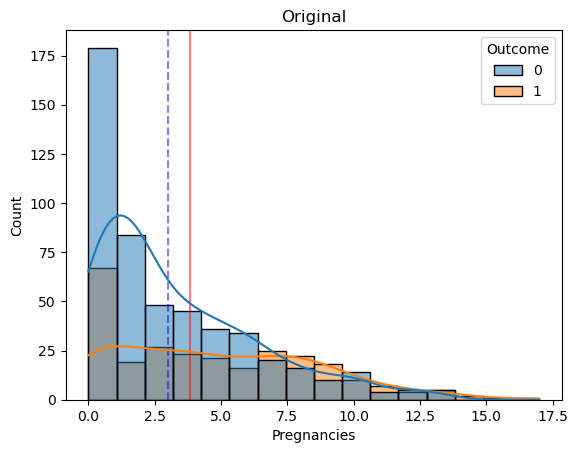

In [28]:
# Distribution of pregnancies column with mean and median lines in histogram plot
plt.title('Original')
plt.axvline(x=dataset2.Pregnancies.mean(),color='red',alpha=0.5,label='Mean')
plt.axvline(x=dataset2.Pregnancies.median(),c='blue',ls='--',alpha=0.5,label='Median')
sns.histplot(x='Pregnancies',data=dataset1,kde=True,hue='Outcome')

<AxesSubplot:xlabel='Outcome', ylabel='Pregnancies'>

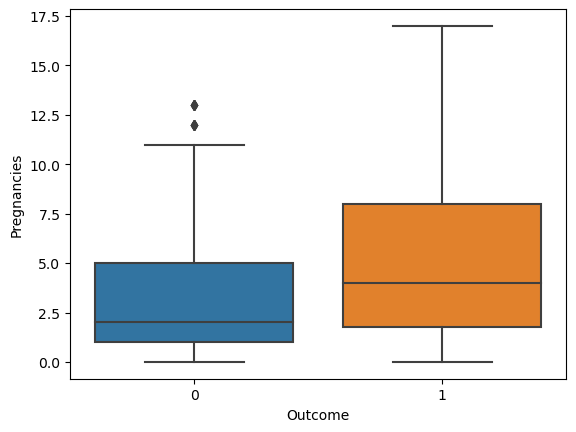

In [30]:
# Boxplot of pregnancies column to observe outlier
sns.boxplot(x="Outcome", y="Pregnancies", data=dataset2)

<AxesSubplot:title={'center':'Original'}, xlabel='Glucose', ylabel='Count'>

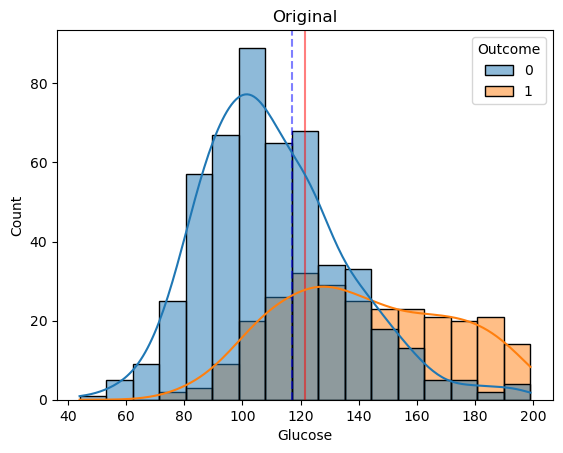

In [31]:
# Distribution of Glucose column with mean and median lines by histogram plot
plt.title('Original')
plt.axvline(x=dataset2.Glucose.mean(),color='red',alpha=0.5,label='Mean')
plt.axvline(x=dataset2.Glucose.median(),c='blue',ls='--',alpha=0.5,label='Median')
sns.histplot(x='Glucose',data=dataset2,kde=True,hue='Outcome')

<AxesSubplot:xlabel='Outcome', ylabel='Glucose'>

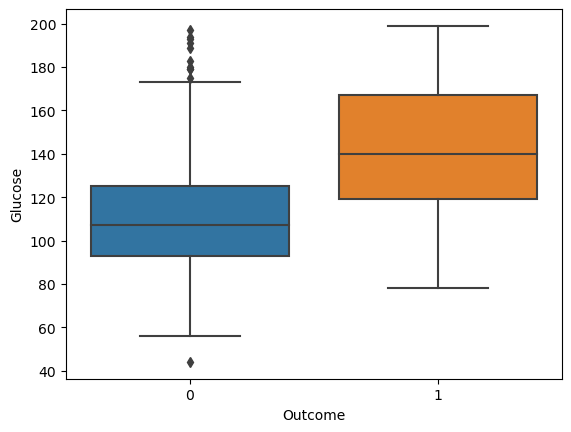

In [33]:
# Boxplot of Glucose column to observe outlier
sns.boxplot(data=dataset2, x="Outcome", y="Glucose")

<AxesSubplot:title={'center':'Original'}, xlabel='Blood_Pressure', ylabel='Count'>

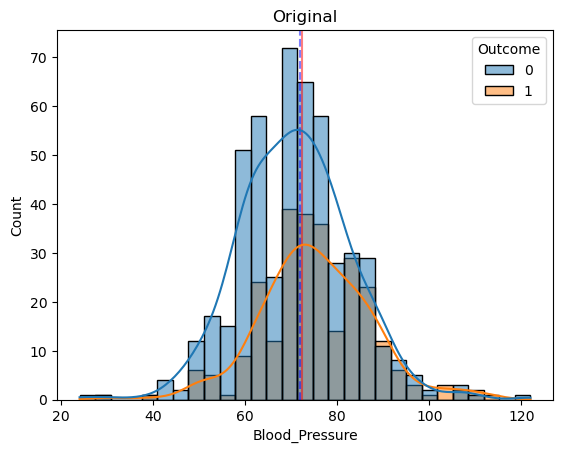

In [34]:
# Distribution of Blood_Pressure column with mean and median lines by histogram plot
plt.title('Original')
plt.axvline(x=dataset2.Blood_Pressure.mean(),color='red',alpha=0.5,label='Mean')
plt.axvline(x=dataset2.Blood_Pressure.median(),c='blue',ls='--',alpha=0.5,label='Median')
sns.histplot(x='Blood_Pressure',data=dataset2,kde=True,hue='Outcome')

<AxesSubplot:xlabel='Outcome', ylabel='Blood_Pressure'>

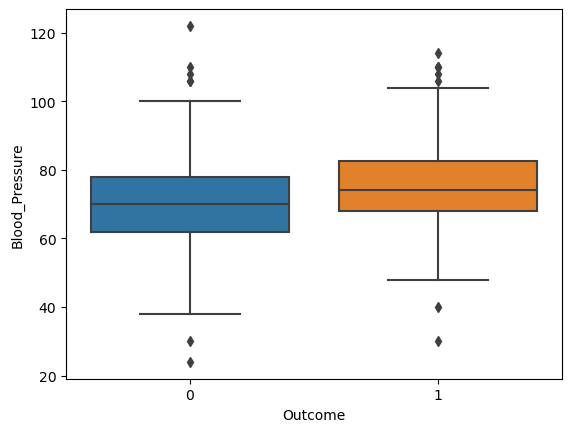

In [35]:
#Boxplot of Blood_Pressure column to observe outlier 
sns.boxplot(data=dataset2, x="Outcome", y="Blood_Pressure")

<AxesSubplot:title={'center':'Original'}, xlabel='Skin_Thickness', ylabel='Count'>

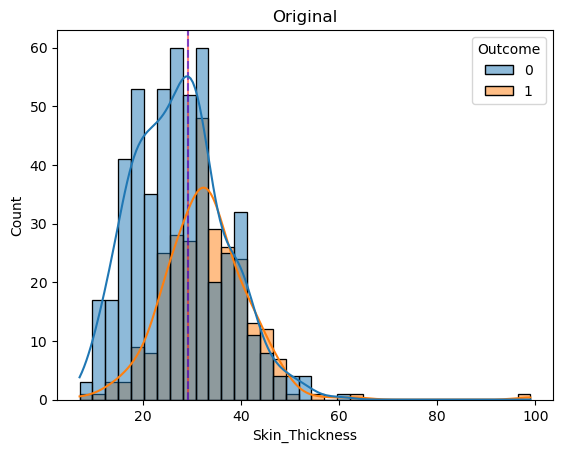

In [36]:
# Distribution of Skin_Thickness column with mean and median lines by histogram plot
plt.title('Original')
plt.axvline(x=dataset2.Skin_Thickness.mean(),color='red',alpha=0.5,label='Mean')
plt.axvline(x=dataset2.Skin_Thickness.median(),c='blue',ls='--',alpha=0.5,label='Median')
sns.histplot(x='Skin_Thickness',data=dataset2,kde=True,hue='Outcome')

<AxesSubplot:xlabel='Outcome', ylabel='Skin_Thickness'>

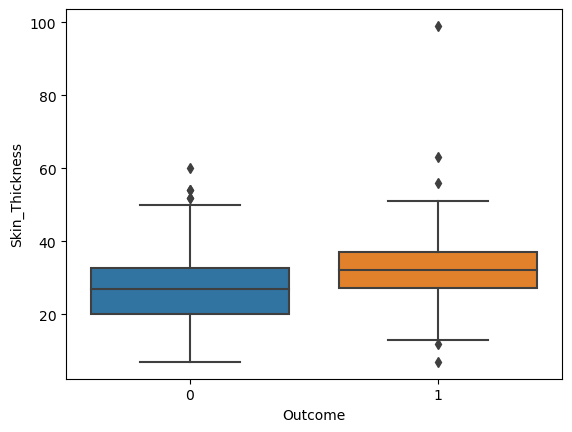

In [37]:
# Boxplot of Skin_Thickness column to observe outlier
sns.boxplot(data=dataset2, x="Outcome", y="Skin_Thickness")

<AxesSubplot:title={'center':'Treated'}, xlabel='Insulin', ylabel='Count'>

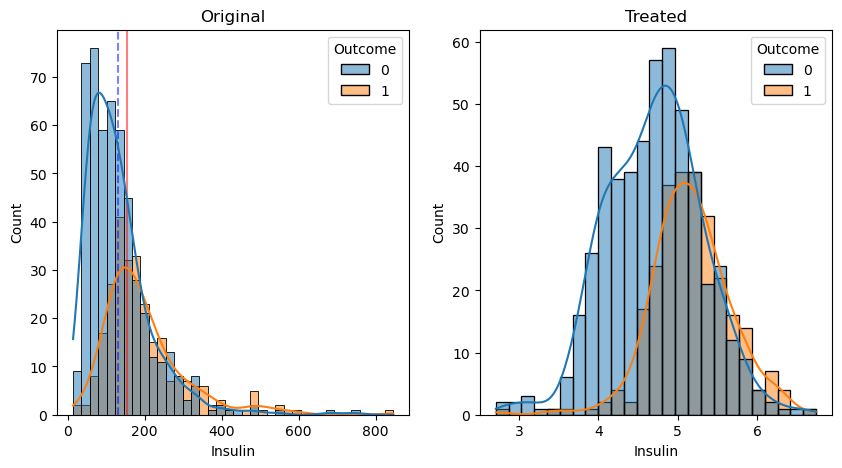

In [38]:
# Distribution of Insulin column with mean and median lines by histogram plot
dataset2['Insulin'] = np.log1p(dataset2['Insulin'])

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Original')
plt.axvline(x=dataset1.Insulin.mean(),color='red',alpha=0.5,label='Mean')
plt.axvline(x=dataset1.Insulin.median(),c='blue',ls='--',alpha=0.5,label='Median')
sns.histplot(x='Insulin',data=dataset1,kde=True,hue='Outcome')

plt.subplot(1,2,2)
plt.title('Treated')
sns.histplot(x='Insulin',kde=True,data=dataset2,hue='Outcome')

<AxesSubplot:xlabel='Outcome', ylabel='Insulin'>

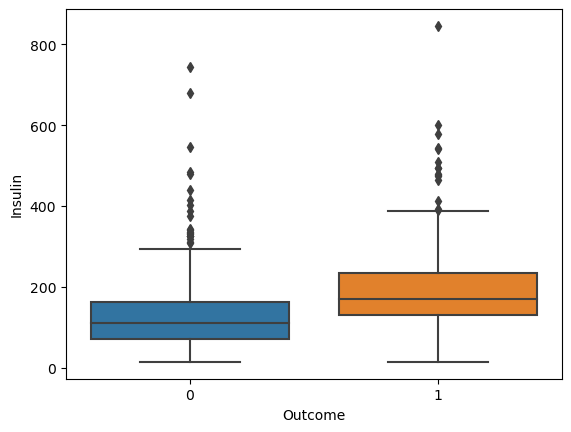

In [39]:
# Boxplot of Insulin column to observe outlier 
sns.boxplot(data=dataset1, x="Outcome", y="Insulin")

<AxesSubplot:title={'center':'Original'}, xlabel='BMI', ylabel='Count'>

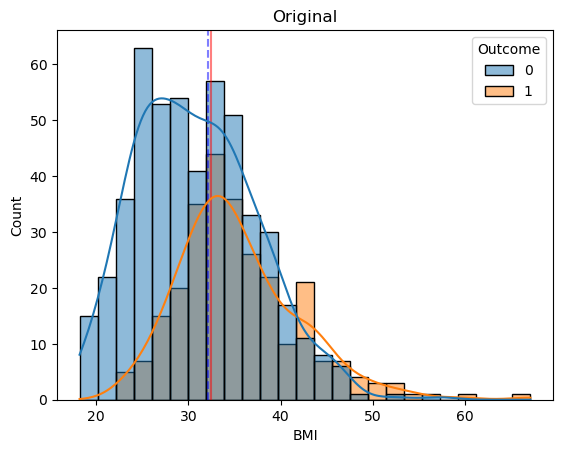

In [40]:
# Distribution of BMI column with mean and median lines by histogram plot
plt.title('Original')
plt.axvline(x=dataset2.BMI.mean(),color='red',alpha=0.5,label='Mean')
plt.axvline(x=dataset2.BMI.median(),c='blue',ls='--',alpha=0.5,label='Median')
sns.histplot(x='BMI',data=dataset2,kde=True,hue='Outcome')

<AxesSubplot:xlabel='Outcome', ylabel='BMI'>

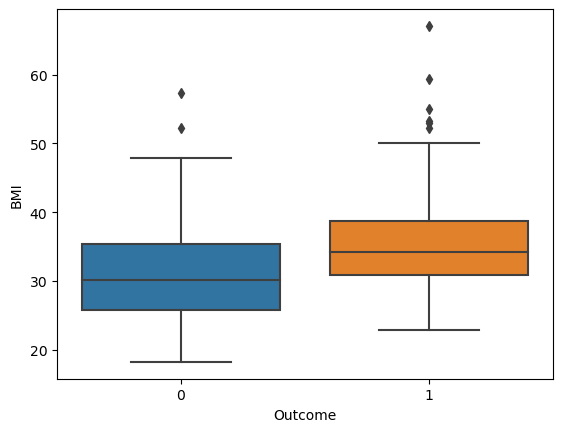

In [41]:
# Boxplot of BMI column to observe outlier 
sns.boxplot(data=dataset2, x="Outcome", y="BMI")

<AxesSubplot:title={'center':'Treated'}, xlabel='Diabetes_Pedigree_Function', ylabel='Count'>

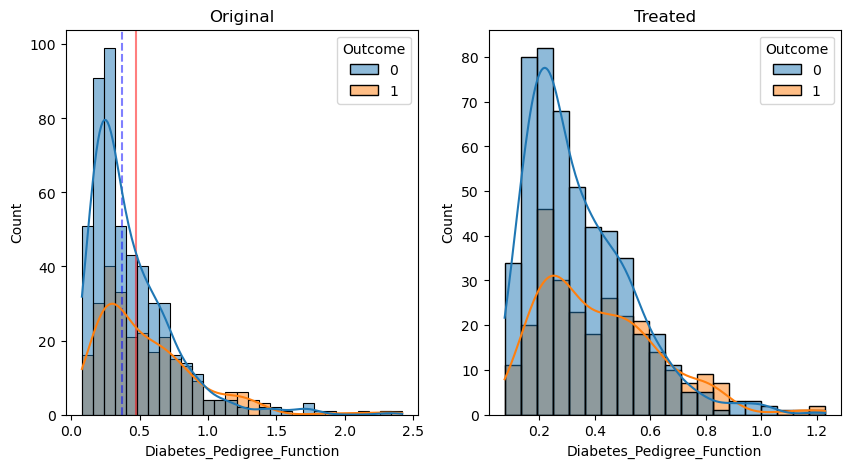

In [42]:
# Distribution of Diabetes_Pedigree_Function column with mean and median  lines by histogram plot
dataset2['Diabetes_Pedigree_Function'] = np.log1p(dataset2['Diabetes_Pedigree_Function'])
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Original')
plt.axvline(x=dataset1.Diabetes_Pedigree_Function.mean(),color='red',alpha=0.5,label='Mean')
plt.axvline(x=dataset1.Diabetes_Pedigree_Function.median(),c='blue',ls='--',alpha=0.5,label='Median')
sns.histplot(x='Diabetes_Pedigree_Function',data=dataset1,kde=True,hue='Outcome')

plt.subplot(1,2,2)
plt.title('Treated')
sns.histplot(x='Diabetes_Pedigree_Function',kde=True,data=dataset2,hue='Outcome')

<AxesSubplot:xlabel='Outcome', ylabel='Diabetes_Pedigree_Function'>

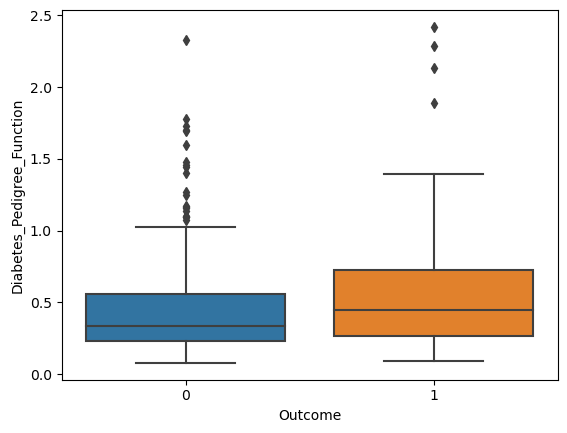

In [43]:
# Boxplot of Diabetes_Pedigree_Function column to observe outlier
sns.boxplot(data=dataset1, x="Outcome", y="Diabetes_Pedigree_Function")

<AxesSubplot:title={'center':'Treated'}, xlabel='Age', ylabel='Count'>

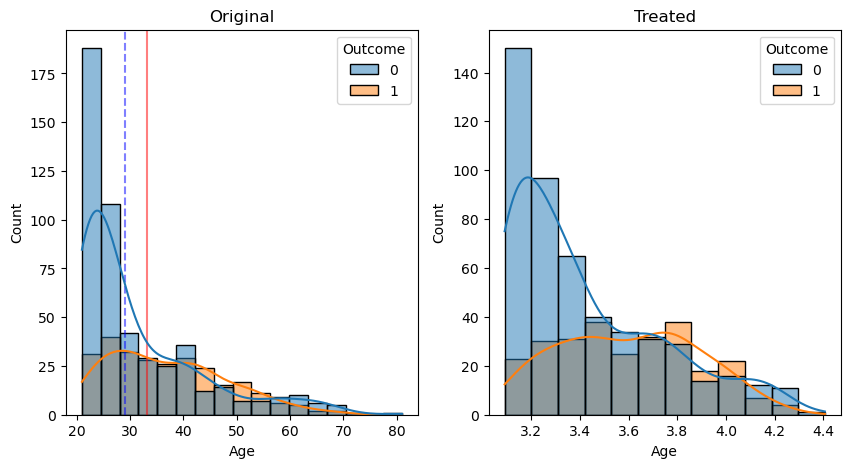

In [44]:
# Distribution of AGE column with mean and median lines by histogram plot
dataset2['Age'] = np.log1p(dataset2['Age'])
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Original')
plt.axvline(x=dataset1.Age.mean(),color='red',alpha=0.5,label='Mean')
plt.axvline(x=dataset1.Age.median(),c='blue',ls='--',alpha=0.5,label='Median')
sns.histplot(x='Age',data=dataset1,kde=True,hue='Outcome')

plt.subplot(1,2,2)
plt.title('Treated')
sns.histplot(x='Age',kde=True,data=dataset2,hue='Outcome')

<AxesSubplot:xlabel='Outcome', ylabel='Age'>

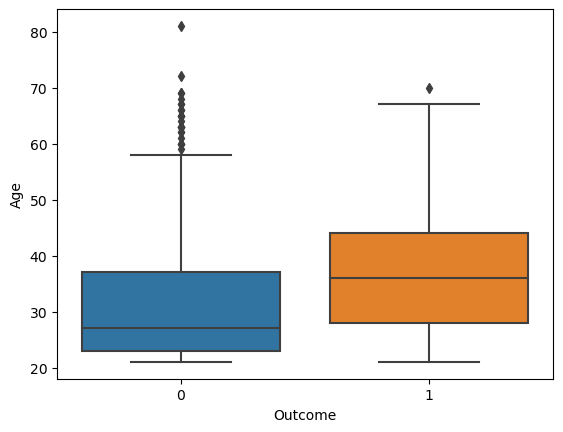

In [45]:
# Boxplot of Age column to observe outlier
sns.boxplot(data=dataset1, x="Outcome", y="Age")

### Step 3: Data Exploration

### 3.1 Using pair plot to understand the relationships.

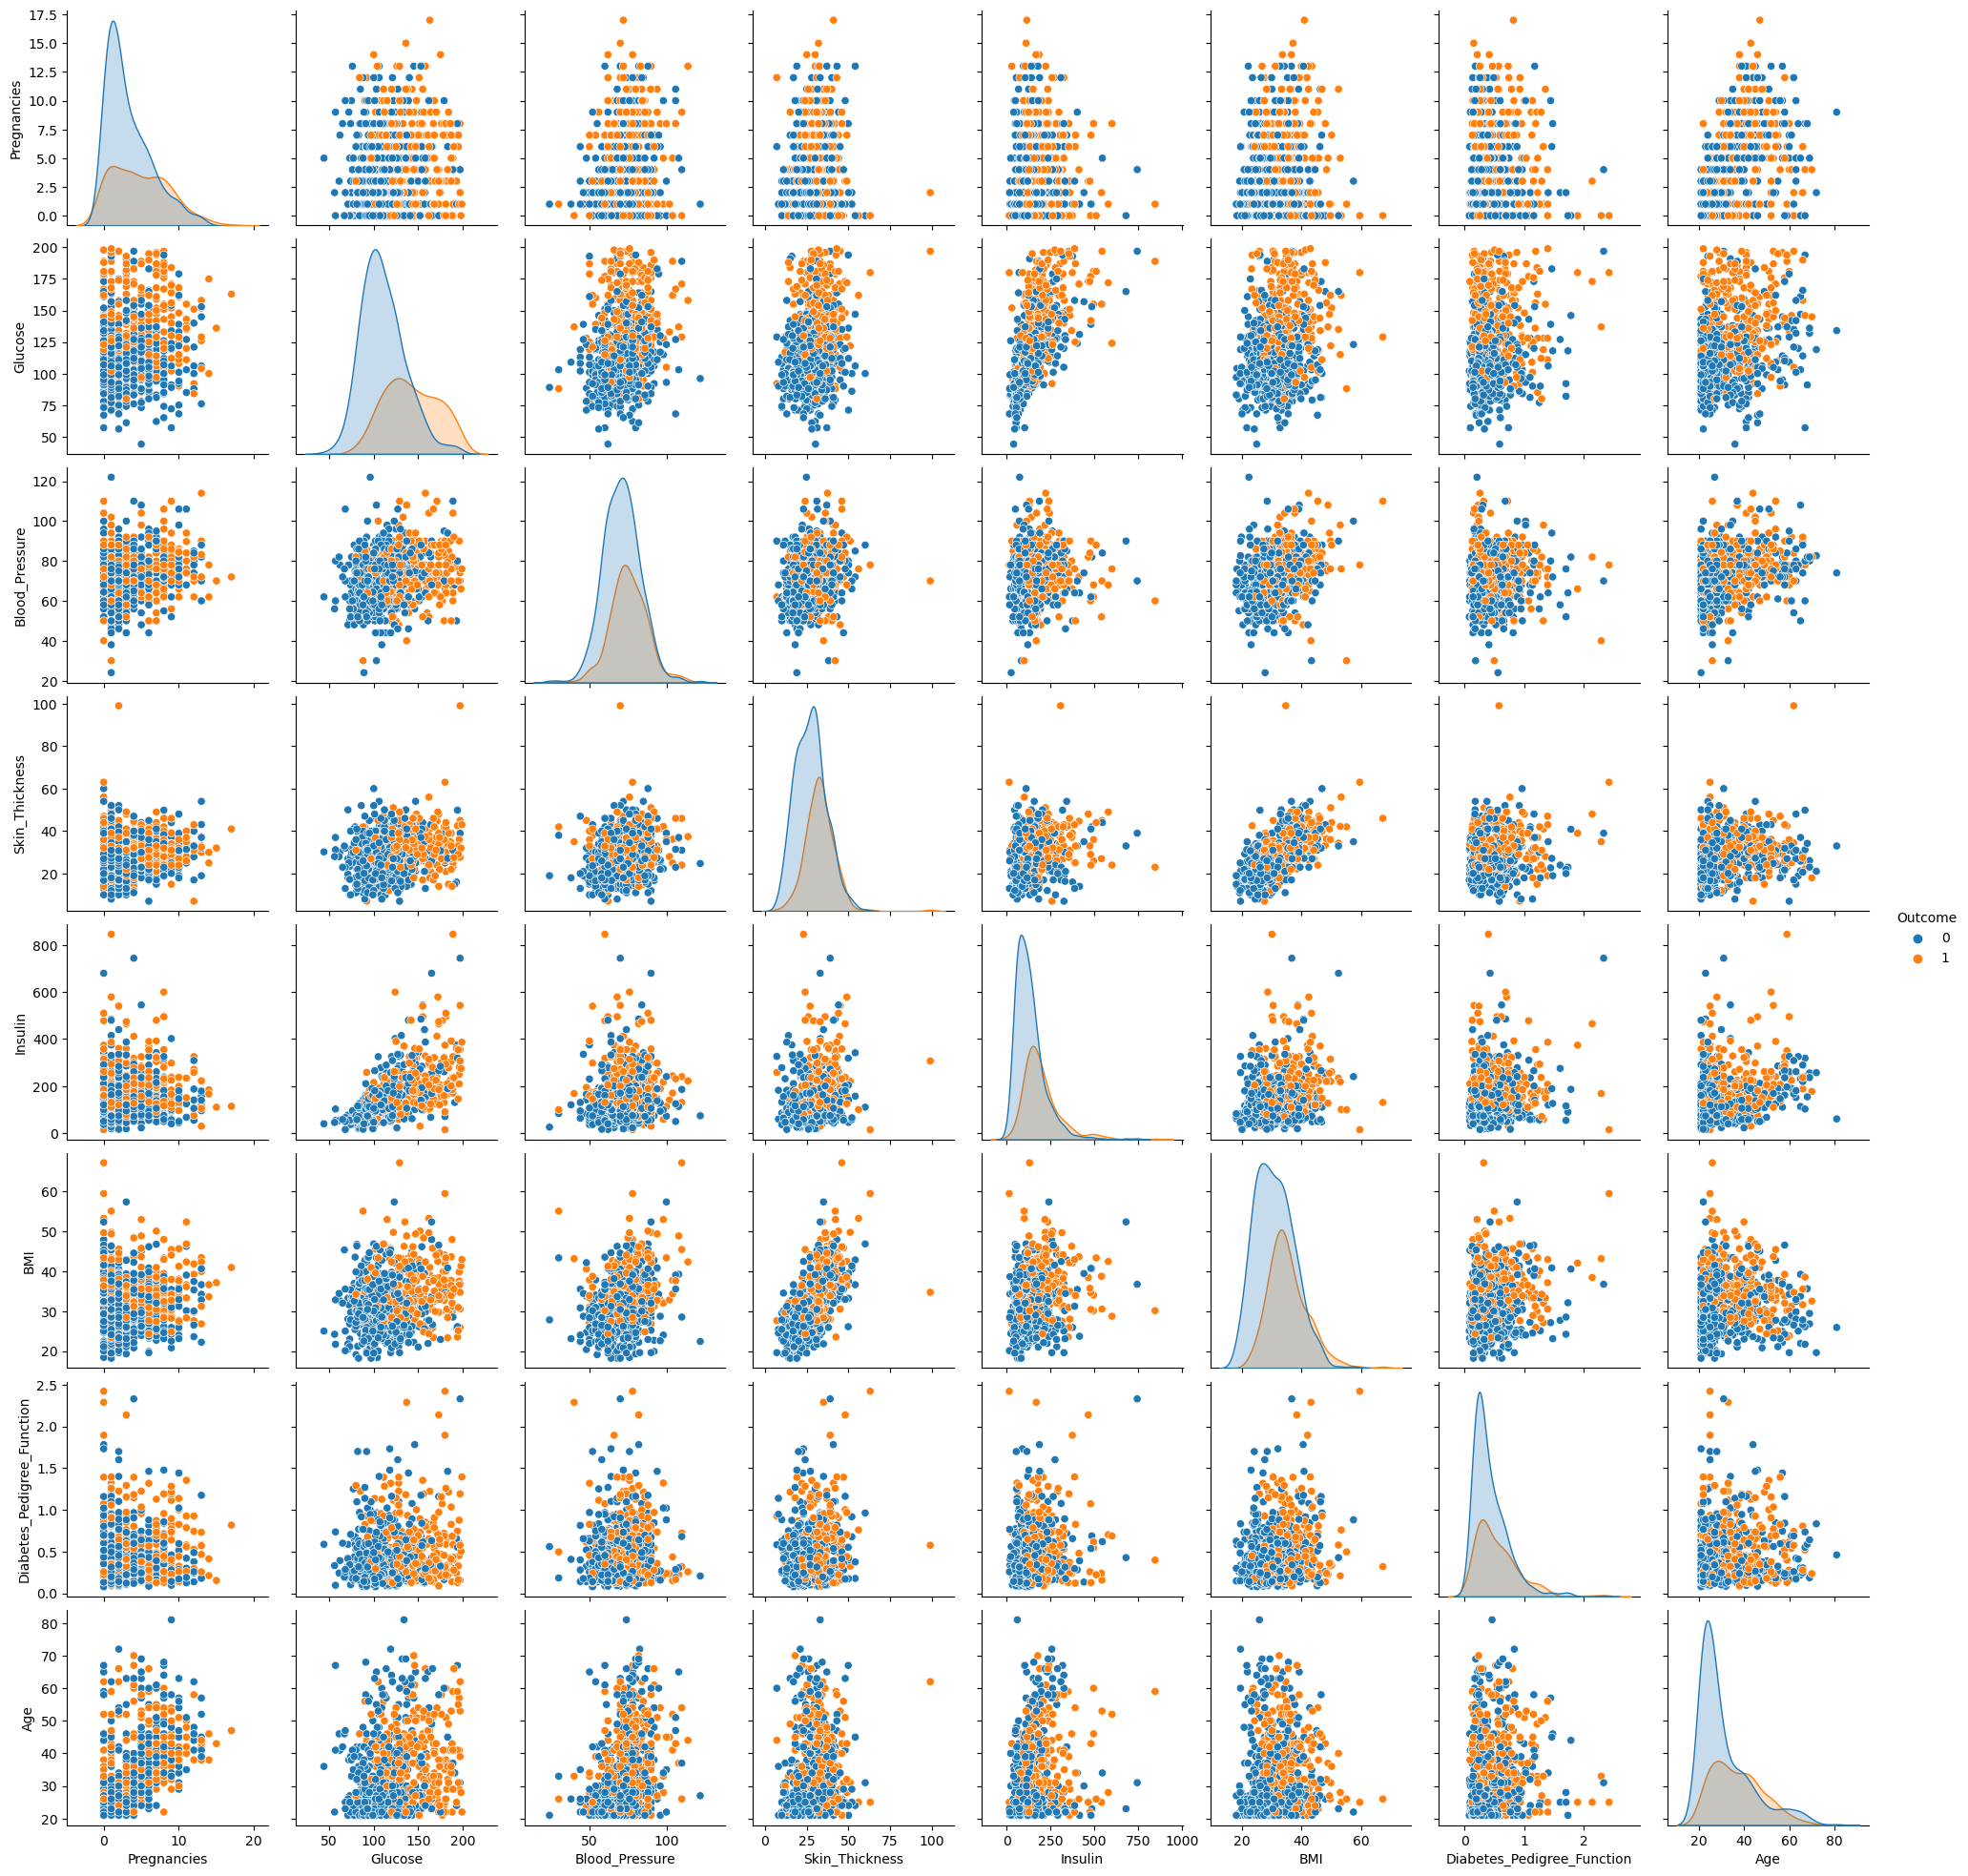

In [46]:
sns.pairplot(dataset1,hue='Outcome') # pairplot of dataset1 with outcome for colour encoding using seaborn
plt.show()

### The pair plot is said to be in a relation with the variables if the points are in a narrow band (up/down) describing the type of relationship :

* Through the pairplot, we observe in the pregnancies column that women who are pregnant more than 10-12 times are more likely   to have diabetes which in result have higher glucose levels.
* The BMI serves as an measure to indicates the ideal range of Body Mass of an individual, the ideal range is 18.5 to 24.9,       people with diabetes have higher ranges resulting to obese or extremely obese states.
* We see people develop diabetes in their twenties and atmost their seventies, no cases are seen above 70-75 which can state     that the people who had diabetes were cured or they did not survive past it.
* People with diabetes have Glucose levels above 120 and BloodPressure between 40 to 110.

### 3.2 Using heat map to perform correlation analysis 

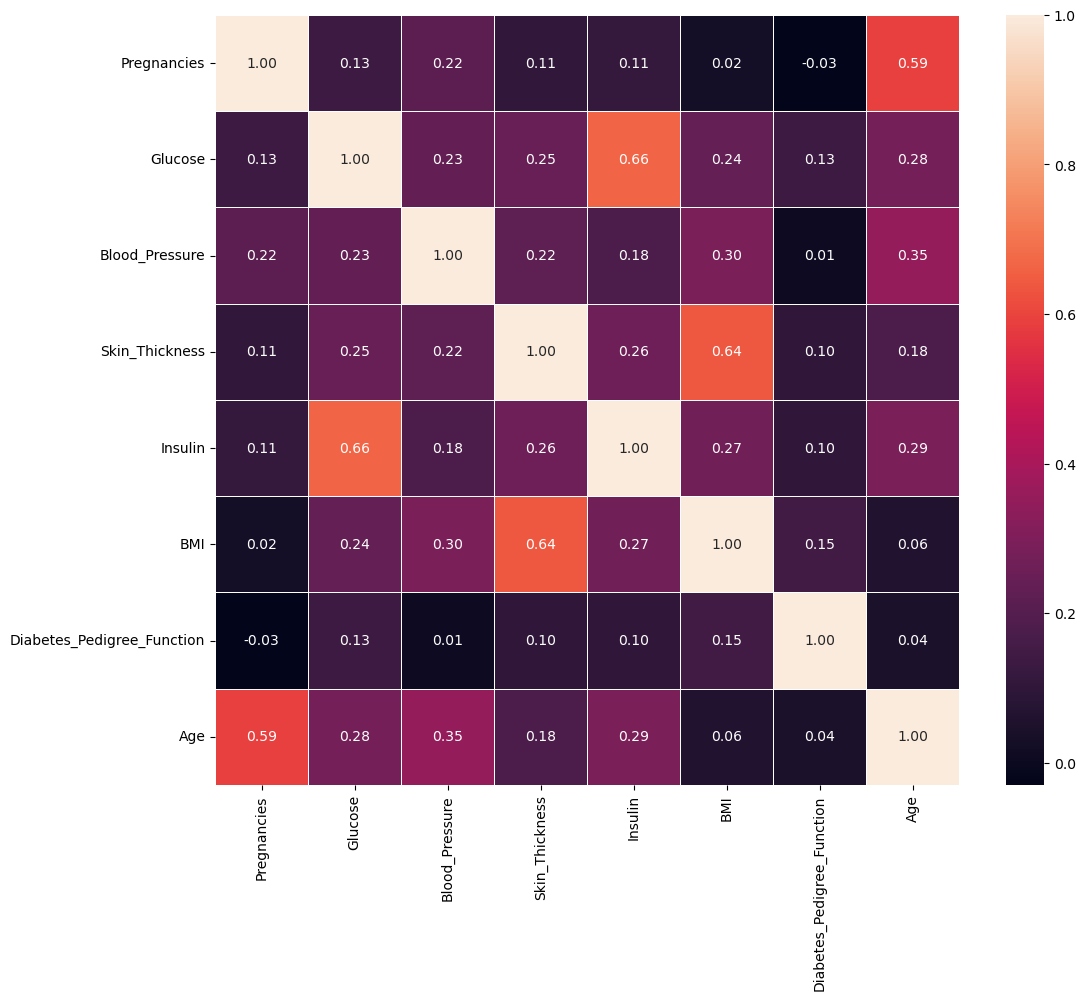

In [47]:
# heatmap of dataset2 to find correlation between all features using seaborn
#corr() is used to find the pairwise correlation of all columns in dataset2 and writing datavalue in each cell upto 2decimal
plt.figure(figsize=(12,10))
sns.heatmap(dataset2.corr(),fmt='.2f',annot=True,linecolor='white',linewidths=0.5) 
plt.show()

### Observation :
* The x-axis represents increasing unit increments of a column variable  and the y-axis represents the relative frequency of diabetes. The graphs produced from this script can be used to roughly judge what variables correlate more closely with diabetes.
* From the heatmap, it seems that Age and Pregnancies, Glucose and Insulin, BMI and Skin Thickness are closely correlated.

### 3.3  Using Scatter plot to understand the relationships

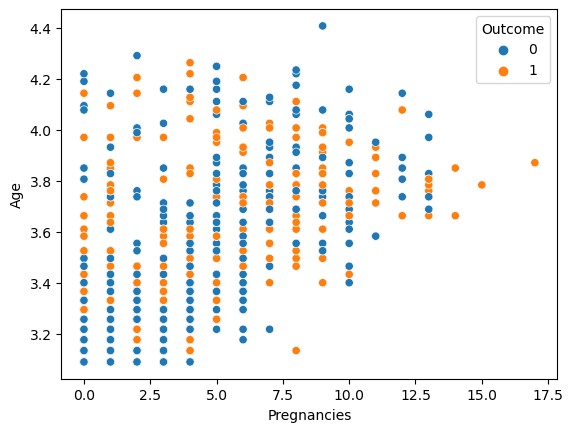

In [48]:
# A relationship between Pregnancies and age with outcome
sns.scatterplot(x = "Pregnancies", y = "Age", hue = "Outcome", data = dataset2)
plt.show()

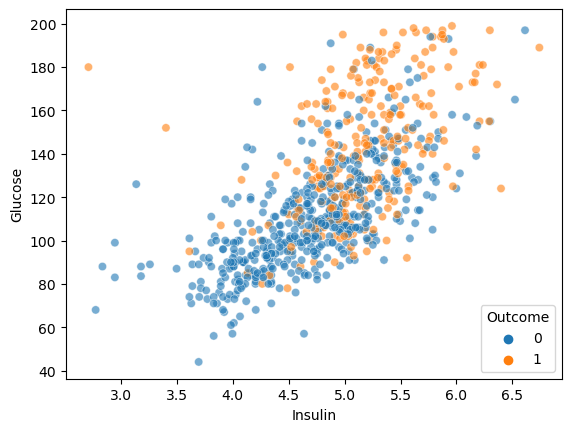

In [49]:
# A relationship between Insulin and glucose with outcome
sns.scatterplot(x = "Insulin", y = "Glucose", hue = "Outcome", alpha=.6, data = dataset2)
plt.show()

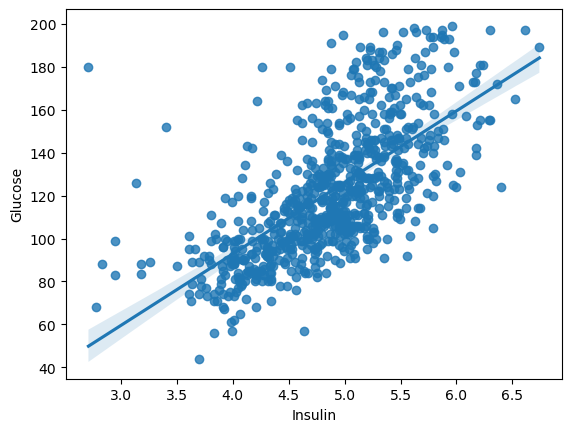

In [50]:
# A relationship between Insulin and glucose
sns.regplot(x = "Insulin", y = "Glucose", data = dataset2)
plt.show()

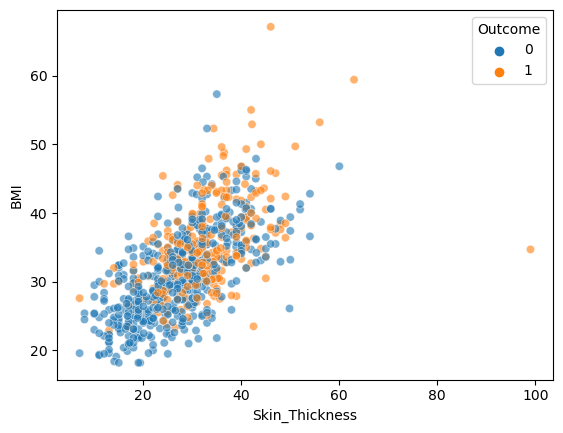

In [51]:
# A relationship between Skin_Thickness and BMI with outcome
sns.scatterplot(x = "Skin_Thickness", y = "BMI", hue = "Outcome", alpha=.6, data = dataset2)
plt.show()

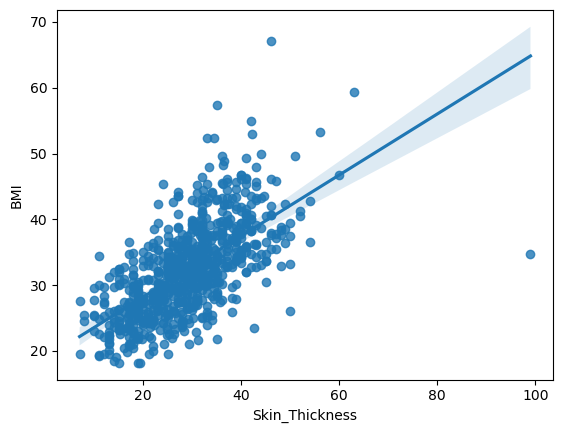

In [52]:
# A relationship between Skin_Thickness and BMI
sns.regplot(x = "Skin_Thickness", y = "BMI",data = dataset2)
plt.show()

#### Observation:
* The relationship between Pregnancies and age is moderatelly positive co-related
* The relationship between Skin_Thickness & BMI  and Insulin & glucose are strongly positive co-related
* With increase glocuse level ,Insulin level also increases and there is strong posibility of getting dibetes with these increased values.
* With increase skinthickness ,BMI level also increases and there is  posibility of getting dibetes with these increased values.


### Step 4:Splitting the dataset into the Training set and Test set

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)
# test_size 0.2 means 20 percent of data will be in test 
# random_State = 1 means, we will get the same information everytime as we are randomly splitting the data.
# random_state means we are just fixing the set here.

In [54]:
x_train              #80% of x(features of dataset2)

,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin,BMI,Diabetes_Pedigree_Function,Age
663,9.0,145.0,80.0,46.000000,130.000000,37.9,0.637,40.0
712,10.0,129.0,62.0,36.000000,198.669504,41.2,0.441,38.0
161,7.0,102.0,74.0,40.000000,105.000000,37.2,0.204,45.0
509,8.0,120.0,78.0,18.929080,325.396083,25.0,0.409,64.0
305,2.0,120.0,76.0,37.000000,105.000000,39.7,0.215,29.0
...,...,...,...,...,...,...,...,...
645,2.0,157.0,74.0,35.000000,440.000000,39.4,0.134,30.0
715,7.0,187.0,50.0,33.000000,392.000000,33.9,0.826,34.0
72,13.0,126.0,90.0,32.365927,122.442204,43.4,0.583,42.0
235,4.0,171.0,72.0,44.622666,411.831126,43.6,0.479,26.0


In [55]:
x_test              #20% of x(features of dataset2)

,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin,BMI,Diabetes_Pedigree_Function,Age
285,7.0,136.0,74.000000,26.000000,135.000000,26.000000,0.647,51.0
101,1.0,151.0,60.000000,26.300752,255.299965,26.100000,0.179,22.0
581,6.0,109.0,60.000000,27.000000,112.803005,25.000000,0.206,27.0
352,3.0,61.0,82.000000,28.000000,52.682362,34.400000,0.243,46.0
726,1.0,116.0,78.000000,29.000000,180.000000,36.100000,0.496,25.0
...,...,...,...,...,...,...,...,...
563,6.0,99.0,60.000000,19.000000,54.000000,26.900000,0.497,32.0
318,3.0,115.0,66.000000,39.000000,140.000000,38.100000,0.150,28.0
154,8.0,188.0,78.000000,33.348299,234.372363,47.900000,0.137,43.0
684,5.0,136.0,82.000000,23.056125,235.883646,29.409648,0.640,69.0


In [56]:
y_train            # 80% of y(Outcome of dataset2)

663    1
712    1
161    0
509    0
305    0
      ..
645    0
715    1
72     1
235    1
37     1
Name: Outcome, Length: 614, dtype: category
Categories (2, int64): [0, 1]

In [57]:
y_test                # 20% of y(Outcome of dataset2)

285    0
101    0
581    0
352    0
726    0
      ..
563    0
318    0
154    1
684    0
643    0
Name: Outcome, Length: 154, dtype: category
Categories (2, int64): [0, 1]

## Conclusion
### I have successfully loaded the data,handled missing values and outliers , explored the data with it's all features and visualised with distribution of data .
### After doing essential feature engineering and exploratory data analysis techniques I have identified  the following important features that are crucial for important machine learning models and  predict whether a patient has diabetes or not  :

* Women who are **pregnant more than 10-12 times are more likely to have diabetes** which in result have **higher glucose levels**.
* People with diabetes have **Glucose levels above 120** and **BloodPressure between 40 to 110**.
* **With increase glocuse level and Insulin level ,there is strong posibility of getting dibetes**.
* **With increase skin thickness and BMI , there is posibility of getting dibetes**.
* The BMI serves as an measure to indicates the ideal range of Body Mass of an individual, the **ideal range is 18.5 to 24.9**,   people with diabetes have higher ranges resulting to obese or extremely obese states.
* **The diabetes are through family history**. Though BMI and Diabetes Pedigree Function shows some relationship which could     mean that structure of a body can be genetic which if not cared can result to diabetes.
* People develop diabetes in their **twenties and atmost their seventies**, no cases are seen above 70-75 which can state that       the people who had diabetes were cured or they did not survive past it.



################################################ Thank you ##################################################################